ML – MIDTERM EXAM (100 Marks)

This notebook is your **single submission file** for the Midterm.

- **Total marks:** 100  
  - Section A: 40 marks  
  - Section B: 60 marks  
- Answer **all questions** in this notebook.  
- Do **not** create a separate PDF.  
- Use clear headings, code, and explanations.

- Run all cells before submitting so all outputs are visible.
- Set the Colab file's shareable link to ‘Anyone with the link’ and ‘View’ access, then submit it in the Phitron Assignment module's Assignment submission section.

In [ ]:
# Common imports for Section B (run once)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_curve, auc

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree

plt.rcParams['figure.figsize'] = (6, 4)
plt.rcParams['axes.grid'] = True

---

## SECTION A – Short Application Questions (40 Marks)

Write your answers in the provided **answer cells** in this notebook. Use text, formulas, and short reasoning.

Marks for each question are clearly mentioned.

---

### Q1. Descriptive Statistics and Distributions (15 marks)

A dataset of monthly customer spending (in dollars) is:

`[30, 35, 32, 34, 33, 500, 31, 34, 32, 33]`

1. Compute the **median** and **IQR**. Show your working clearly.  
2. Use the **IQR rule** to check if 500 is an outlier. Show your steps and the fences.  
3. Explain in 3 to 5 sentences why **median + IQR** may be better than **mean + standard deviation** for this dataset.

Write your full answer in the cell below.


#### Q1 Answer (Student)

1. Ans: The median and IQR is computed below. The median is 33 and IQR is 2.
2. Ans: In the below code section the Upper bound and the lower bound of the dataset is calculated uning IQR. There we can see the range for the outlier is between 29 to 37. So 500 is an outier it is not in the range.
3. Ans: In the given dataset there is a outlier 500. Mean and standard deviation dosen't give accurate senario of the data. Outlier data have a big difference which dose not relate with the mean and standard deviation. Median and IQR are outlier resistant to extreme values. They are not effected by outliers. So median and IQR are better.

In [ ]:
# Optional helper code for Q1 (not required)
data_q1 = [30, 35, 32, 34, 33, 500, 31, 34, 32, 33]

me = np.median(data_q1)
q1 = np.percentile(data_q1, 25)
q3 = np.percentile(data_q1, 75)
IQR = q3 - q1

lower_bound = q1 - 1.5*IQR
upper_bound = q3 + 1.5*IQR

print("Median is ",me)
print("IQR is ", IQR)
print(f"Outlier Range {lower_bound} to {upper_bound}")


Median is  33.0
IQR is  2.0
Outlier Range 29.0 to 37.0


### Q2. Bayes and Probability in ML (10 marks)

A disease affects **1 percent** of people.  
A test has:  
- Sensitivity: **90 percent**  
- Specificity: **92 percent**  

A random person tests positive.

1. Compute the **positive predictive value (PPV)** using Bayes theorem. Show all steps with probabilities.  
2. If prevalence rises to **20 percent**, explain in 3 to 4 sentences whether PPV increases or decreases and why. You may refer to the Bayes formula in words.

Write your full answer in the cell below.


#### Q2 Answer (Student)

1. Here, P(D) = 0.01 so, P(D')= 1- 0.01 = 0.99

    Sensitivity, P(+|D) = 0.90

    Specificity, P(-|D') = 0.92 so,  P(+|D') = 1-0.92 = 0.08

    Now,
    
    P(+) = P(+|D)P(D)+P(+|D')P(D')

    P(+) = 0.90*(0.01) + 0.08*(0.99) = 0.0882

    PPV, P(D|+) = P(+|D) P(D)/P(+)
    
      = 0.90*0.01 / 0.0882 = 0.102 = 10.2%

  2. If prevalance P(D) is increased the PPV will increase because they are proportional in  Bayes theorem. Proportional means if one increase another one will increase and if one decrease other one will decrease.





### Q3. ML Pipeline Thinking (15 marks)

Columns in a new dataset:

- `age` (numeric)  
- `region` (categorical with 7 levels)  
- `daily_clicks` (numeric)  
- `premium_user` (0 or 1 target)

1. Identify the **type of ML task**. (1 or 2 lines)  
2. List **four preprocessing steps** that would be reasonable for this dataset. (bullet points are fine)  
3. In one short paragraph (6 to 8 sentences), describe the **end to end ML pipeline** you would follow for this problem, from raw data to model evaluation.

Write your full answer in the cell below.


#### Q3 Answer (Student)

1. This is a supervised learning classification type. Because here the target variable have only two possible class 0 and 1.

2. Four Preprocessing steps that would be reasonable are-
*   Handling missing values
*   One-hot encoding
*   Normalization and scelling
*   Remove / cap outliers

3. At first I will try to undestand the data by visualizing it's data types and missing values. Then I will start the process. Firstly I will clean all the missing values by appling median for the numerical datas and mode to the categorical datas. Then I will encode the categorical data of region column using One-hot encoding. And then Normalization and scalling will be applied on numerical data columns daily_clicks ans age if needed. I will use IQR method to detect the outliers using upper and lower bound. If any extreme outliers exist it can be handled by removing the outliers or using cap outliers. Then to prevent data leakage I will split the datas into two section tain set and test set. Then I will use logistic regression model to train my ML model. The training will be on the train set datas. Then the accuracy will be checked how the model performs.





---

## SECTION B – Applied Coding Problems (60 Marks)

Answer **all three questions** in this section.

- Write clean, commented code.  
- After each main step, add a short markdown explanation of what you did and what you observe.  
- Make sure all plots are visible in the notebook.

Marks for each question are clearly mentioned.

---

### Q4. Applied EDA and Preprocessing (20 marks)

We work with the following dataset:

```python
import pandas as pd

df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})
```

**Tasks (20 marks total):**

1. **Compact EDA using pandas** (6 marks)  
   - Show missing value summary for each column.  
   - Show number of unique values per column.  
   - Show correlation among numeric columns.  
   - Plot:  
     - A histogram of `purchases`.  
     - A bar chart for `region` frequency.

2. **Preprocess the dataset using sklearn plus pandas** (9 marks)  
   - Impute `age` with **median**.  
   - Impute `purchases` with **mean**.  
   - One hot encode `region`.  
   - Scale all numeric columns using **RobustScaler**.

3. **Create one domain driven feature** (3 marks)  
   - Example ideas: `high_spender` based on `purchases`, or `age_group` bins, or an interaction like `age * purchases`.

4. Show the **final transformed dataframe** ready for model training. (2 marks)

Use short explanations in markdown to describe each main block of code.


,age,region,purchases,premium_user
0,25.0,north,3.0,0
1,30.0,south,10.0,1
2,NaN,north,5.0,0
3,22.0,east,NaN,0
4,45.0,west,20.0,1
5,52.0,west,18.0,1
6,NaN,south,9.0,0


Missing Values
age             2
region          0
purchases       1
premium_user    0
dtype: int64

Number of Unique values
age             5
region          4
purchases       6
premium_user    2
dtype: int64
                   age  purchases  premium_user
age           1.000000   0.923677      0.789534
purchases     0.923677   1.000000      0.825860
premium_user  0.789534   0.825860      1.000000



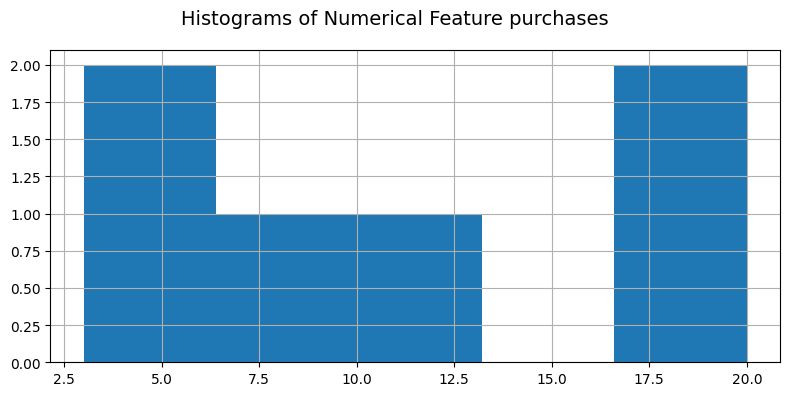

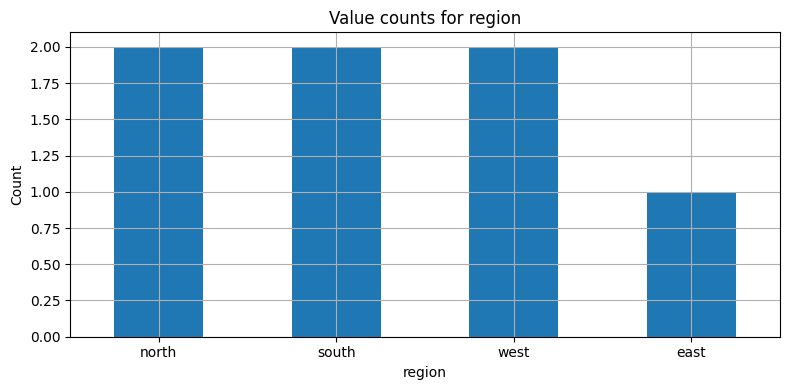

In [ ]:
# Q4 – Student Answer

# Step 1: Create the dataframe
df = pd.DataFrame({
    "age": [25, 30, None, 22, 45, 52, None],
    "region": ["north","south","north","east","west","west","south"],
    "purchases": [3, 10, 5, None, 20, 18, 9],
    "premium_user": [0,1,0,0,1,1,0]
})

display(df)

# Missing value summery
print("Missing Values")
print(df.isna().sum())
print()

# Number of unique values per column
print("Number of Unique values")
print(df.nunique())

# Correlation among numerical column
numerical_col = ['age', 'purchases', 'premium_user']
corr_matrix = df[numerical_col].corr()
print(corr_matrix)

# Histogram Plot
print()
df['purchases'].hist(bins=5, figsize=(8,4))
plt.suptitle("Histograms of Numerical Feature purchases", fontsize=14)
plt.tight_layout()
plt.show()

# Bar Plot
print()
plt.figure(figsize=(8,4))
df['region'].value_counts().plot(kind='bar')
plt.title(f"Value counts for region")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# Q4 – Student Answer # Data preprocessing
 # Impute age with median.
df['age'] = df['age'].fillna(df['age'].median())

# Impute purchases with mean.
df['purchases'] = df['purchases'].fillna(df['purchases'].mean())

# One hot encode region.
df_encoded = pd.get_dummies(df, columns=['region'], dtype=int)

# Robust scalling
num_col = ['age', 'purchases']
scaler_rb = RobustScaler()

df_encoded[num_col] = scaler_rb.fit_transform(df_encoded[num_col])

# One domain driven feature
df_encoded['age_purchases_inheritation'] = df_encoded['age'] * df_encoded['purchases']

#  Final Transformed dataframe
df_encoded

,age,purchases,premium_user,region_east,region_north,region_south,region_west,age_purchases_inheritation
0,-0.5,-0.943820,0,0,1,0,0,0.471910
1,0.0,0.000000,1,0,0,1,0,0.000000
2,0.0,-0.674157,0,0,1,0,0,-0.000000
3,-0.8,0.112360,0,1,0,0,0,-0.089888
4,1.5,1.348315,1,0,0,0,1,2.022472
5,2.2,1.078652,1,0,0,0,1,2.373034
6,0.0,-0.134831,0,0,0,1,0,-0.000000


_Use additional code cells below for EDA, preprocessing, feature engineering, and final dataframe. Add brief explanations in markdown between code blocks._

---

### Q5. Applied Regression and Residual Analysis (20 marks)

We use this dataset:

```python
import pandas as pd

df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})
```

**Tasks (20 marks total):**

1. Create the dataframe `df2`. (1 mark)  
2. Split the data into **train and test** with 80 percent train and 20 percent test. (3 marks)  
3. Fit a **LinearRegression** model to predict `price` from `area_sqft` and `bedrooms`. (4 marks)  
4. Print model **intercept**, **coefficients**, and **predictions** on the test set. (4 marks)  
5. Compute the following metrics on the test set. (6 marks)  
   - Mean Absolute Error (MAE)  
   - Root Mean Squared Error (RMSE)  
   - R squared (R²)  
6. Plot a **residual plot** with `y_true − y_pred` on the vertical axis and `y_pred` on the horizontal axis. (2 marks)  
   - Add a short note explaining what you observe from the residuals.

Again, use short markdown explanations to describe each step.


interceprt: [-33.84615385]
coefficients: [0.15384615 5.38461538]

Prediction on test: [[100.        ]
 [130.76923077]]

MAE: 19.615384615384613
RMSE: 19.61915499208746
R2: -0.7107166337935567



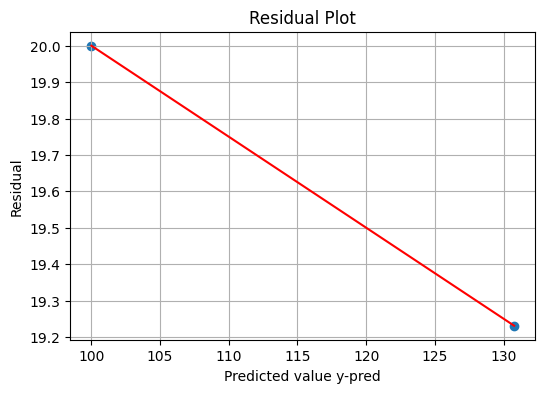

In [ ]:
# Q5 – Student Answer

# Step 1: Create the dataframe
df2 = pd.DataFrame({
    "area_sqft": [800, 1000, 1200, 1500, 1800, 2000],
    "bedrooms": [2,2,3,3,4,4],
    "price": [120, 150, 170, 210, 260, 300]
})


# train and test split
target_col = ['price']
x = df2.drop(columns=target_col)
y = df2[target_col]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

# Fit a LinearRegression model
model = LinearRegression()
model.fit(x_train, y_train)

#intercept, coefficients, and predictions on the test set
print("interceprt:", model.intercept_)
print("coefficients:", model.coef_[0])

y_pred = model.predict(x_test)

print()
print("Prediction on test:", y_pred)

# Regression Evaluation Metrics (R², MAE, RMSE)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print()
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)
print()

# Plot
residual = y_test - y_pred

plt.figure(figsize=(6,4))
plt.scatter(y_pred, residual)
plt.plot(y_pred, residual, color='red')

plt.xlabel("Predicted value y-pred")
plt.ylabel("Residual")
plt.title("Residual Plot")
plt.show()
# Here the plots are very scattered. There is a Linear replation nad the coefficient is negative, which is down word.

_Use additional code cells below for train test split, model training, metrics, and the residual plot. Add a brief comment on the residuals in markdown._

---

### Q6. Applied Classification, Metrics, Trees and ROC (20 marks)

We start with:

```python
import numpy as np

y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])
```

**Part 1: Threshold based classification and metrics (8 marks)**

1. With threshold **0.5**, convert probabilities to class predictions. Then compute:  
   - Confusion matrix  
   - Precision  
   - Recall  
   - F1 score

2. With threshold **0.3**, convert probabilities to class predictions again and recompute the same metrics.

3. In 3 to 4 sentences, explain how lowering the threshold from 0.5 to 0.3 changed precision and recall and why this happens.

**Part 2: ROC and AUC (6 marks)**

4. Plot the **ROC curve** using `y_true` and `y_prob`.  
5. Compute the **AUC** and print it with 3 decimal places.  
6. Add a one or two line comment on what a high or low AUC means in this context.

**Part 3: Decision Tree on a small dataset (6 marks)**

Create this dataset:

```python
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
```

7. Fit a `DecisionTreeClassifier(max_depth=2)` to predict `passed` from `hours`.  
8. Plot the tree using `plot_tree`.  
9. Write 2 to 3 lines explaining whether the tree looks like it might **overfit** or **generalize well**, given the dataset size and the model depth.


In [ ]:
# Q6 – Student Answer

# Part 1: threshold based classification
y_true = np.array([1,0,1,0,1,0,1,0,1,0])
y_prob = np.array([0.9,0.1,0.85,0.2,0.7,0.4,0.6,0.3,0.95,0.05])

# Write your code for threshold 0.5 and 0.3 below
y_pred = (y_prob>=0.5).astype(int)
y_pred2 = (y_prob>=0.3).astype(int)

#1 cnfusion matrix, precision, recall, F1 score THRESHOLD 0.5
print("converted", y_pred)
print()
conf_mat = confusion_matrix(y_true, y_pred)
prec = precision_score(y_true, y_pred)
rec = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print('Confusion Matrix :', conf_mat)
print('Precision:', round(prec, 3))
print('Recall   :', round(rec, 3))
print('F1 score :', round(f1, 3))

#2 cnfusion matrix, precision, recall, F1 score THRESHOLD 0.3
print()
print("converted", y_pred2)
print()
conf_mat = confusion_matrix(y_true, y_pred2)
prec = precision_score(y_true, y_pred2)
rec = recall_score(y_true, y_pred2)
f1 = f1_score(y_true, y_pred2)

print('Confusion Matrix :', conf_mat)
print('Precision:', round(prec, 3))
print('Recall   :', round(rec, 3))
print('F1 score :', round(f1, 3))

converted [1 0 1 0 1 0 1 0 1 0]

Confusion Matrix : [[5 0]
 [0 5]]
Precision: 1.0
Recall   : 1.0
F1 score : 1.0

converted [1 0 1 0 1 1 1 1 1 0]

Confusion Matrix : [[3 2]
 [0 5]]
Precision: 0.714
Recall   : 1.0
F1 score : 0.833


 **Q6- Student Answer**

 Ans: When the threshold is 0.5 we can see here the precision is 1 and same for the Recall ans F1 score. And when the threshold is decreased then we can see the precision has decreased to 0.714, and F1 score decreased to 0.833 on the other hand Recall remains same which is 1. So 0.3 threshold increases the number of predicted positives.

_Add more code cells for ROC and AUC, and for the decision tree on df3. Write your short explanations in markdown after the relevant outputs._

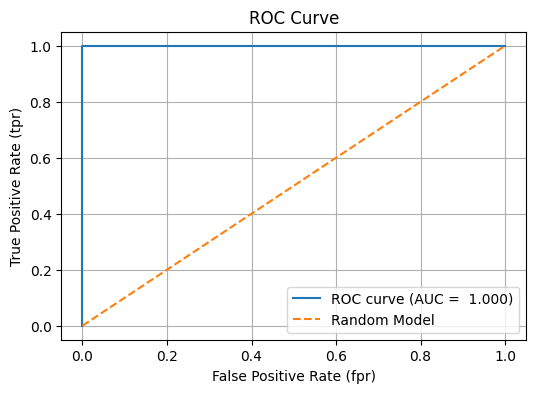


AUC:  1.0


In [ ]:
# ROC curving
fpr, tpr, thresholds = roc_curve(y_true, y_pred)

# plot
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc: .3f})')
plt.plot([0,1], [0,1], linestyle='--', label='Random Model')
plt.xlabel('False Positive Rate (fpr)')
plt.ylabel('True Positive Rate (tpr)')
plt.title("ROC Curve")
plt.legend()
plt.show()
print()

# Compute the AUC
roc_auc = auc(fpr, tpr)
print('AUC: ', round(roc_auc, 3))

**6**

Ans: Here the AUC is 1. Which means the model can perfectly separate the possitive and negative classes perfectly.

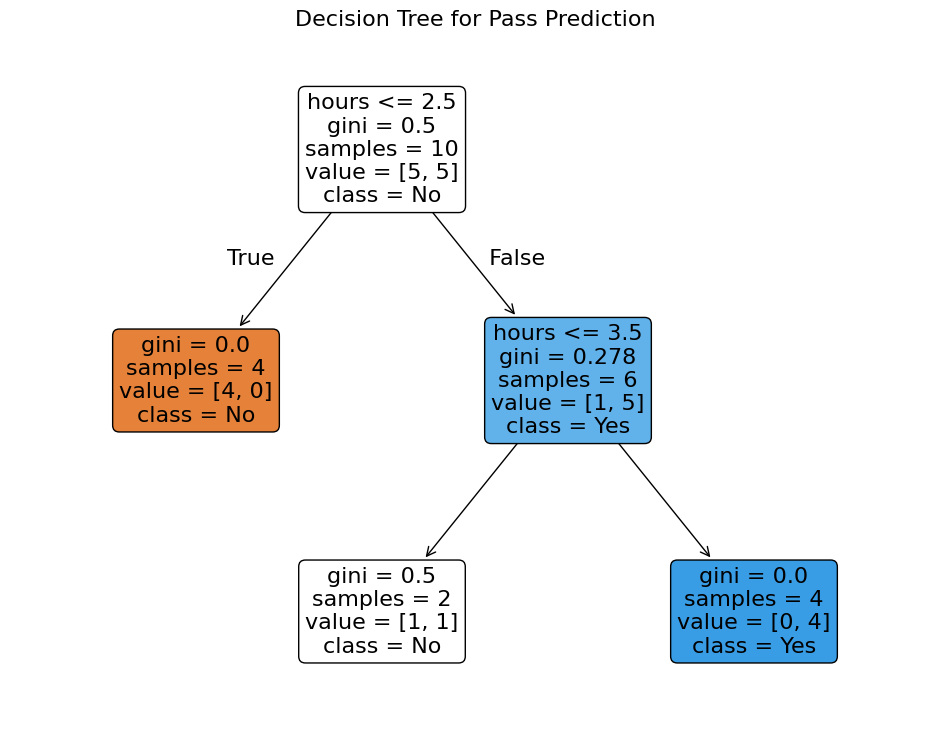

In [ ]:
# Decision tree in a small dataset
#7
df3 = pd.DataFrame({
    "hours": [1,2,3,4,5,1,2,3,4,5],
    "passed": [0,0,0,1,1,0,0,1,1,1]
})
X=df3[['hours']]
y = df3[['passed']]

dtc= DecisionTreeClassifier(max_depth=2)
dtc.fit(X,y)

#8
plt.figure(figsize=(12,9))
plot_tree(
    dtc,
    feature_names=['hours'],
    class_names=['No','Yes'],
    filled=True,
    rounded=True,
    fontsize=16
)
plt.title("Decision Tree for Pass Prediction", fontsize=16)
plt.show()


**9**

Ans: This model is not ovefiting seems like. Because here the depth of the tree is fixed, so it is a very simple tree and here the tree is taking decision on the basis of a simple and small data hours.